# Synthetic Portfolio/Matching  for financial event studies: an example
## 1. Merger Announcements: Short term effects on stock retunrs of the potential acquirer/bidder (Microsoft Corp) 
On February 1, 2008, Microsoft unveiled a hostile offer for Yahoo Inc (YHOO) of $44.6$ billion. Microsoft Corp’s (MSFT) offer of $31$ dollars per Yahoo share consisted of one-half cash and one-half Microsoft shares, and represented a $62\%$ premium to Yahoo’s closing price on the previous day. However, Yahoo’s board of directors – led by co-founder Jerry Yang – rejected Microsoft’s offer, saying that it substantially undervalued the company. Unfortunately, the credit crisis that gripped the world later that year also took its toll on Yahoo shares, resulting in the stock trading below $10$ by November 2008. Yahoo’s subsequent road to recovery was a long one, and the stock only exceeded Microsoft’s original $31$ offer five and a half years later in September 2013.

Read more: How Mergers and Acquisitions Can Affect A Company | Investopedia http://www.investopedia.com/articles/investing/102914/how-mergers-and-acquisitions-can-affect-company.asp#ixzz4sZ1VgjjF 

## 2. Event studies, potential outcomes and synthetic portfolio
Event studies are a popular approach in empirical finance since the sixties (Corrado, 2011). The most common approach to estimate expected "normal" returns is the market model. 

Causal inference has attracted attention accross many disciplines (computer sciences, social an biomedial sciences). In empirical economics these tecniques have created a credibility revolution (Angrist and Pischke, 2010). Empirical research questions beyond description and association.

In event studies this notion of expected "normal" returns can be considered as a potential outcome. Since these event studies are observational in nature, then this potential outcome is not observable. How do we attempt to measure this unobservable outcome?model base imputation (market model), weighting\blocking, and/or matching.

The synthetic control method (Abadie, Diamond and Hainmuller, 2010),  has received a lot of attention in comparative case studies on different subjects: terrorism, natural disasters, tabacco control programs. As opposed to competing methods, synthetic control method's strength relies in the use of a combination of units to built a more objective comparison for the unit exposed to the intervention, rather than a choosing a single unit or a "Ad hoc" reference group. The authors advocate for the use of data drive procedures to build the reference group. The synthetic control method is a weighted average of the available control units, that makes explicit: the contribution of each unit to the counterfactual of interest and the similarities (or lack thereof) between the unit affected by the event or the intervention of interest and the synthetic control in terms of the pre-intervention outcomes and other predictors of post-intervention outcomes.

Synthetic matching techniques applied for event studies in finance are not common, we are only aware of their application in a recent paper, Acemoglu, Johnson, Kermani and Kwak (2016). In this paper the authors measure the effect of personal connections on the returns of financial firms. The study is based on the connections of Timothy Geithner to different financial institutions prior to his nomination as Treasury Secretary at the end of 2008. The synthetic matching methodology is used as a complement to the usual approach in event studies of capturing the difference between a treatment and control group using for the latter the mean return model or the fitted market model. 

We provide an example of the synthetic matching technique, which we denote as synthetic portfolio method (as special case of synthetic control methods) that has important potential in financial event studies.

The first paper where we explore the methodology provides an aplication with intraday data and evaluates the effectiveness of volatility auctions, a type of trading halt mechanism found in many stock markets (it has some similarity to limit-up/limit-down). The working paper version can be found: http://repository.urosario.edu.co/bitstream/handle/10336/13211/dt195.pdf?sequence=3

In [3]:
#Libraries
import pandas as pd
import numpy as np
import pickle
from pandas.tseries.offsets import *   
from itertools import chain
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from scipy import stats
from IPython.display import Image

## 3. Read data and obtain data for estimation window. 

In [4]:
#read event timeline
filepath="DatesE10107.csv"
edate=pd.read_csv(filepath,sep=",",parse_dates=[1],index_col=[0],header=None, names=["event","date"])
edate

,date
event,
T1,2007-02-27
T2,2007-10-01
T3,2007-12-11
T4,2008-01-17
Event_0,2008-02-01
T5,2008-02-15


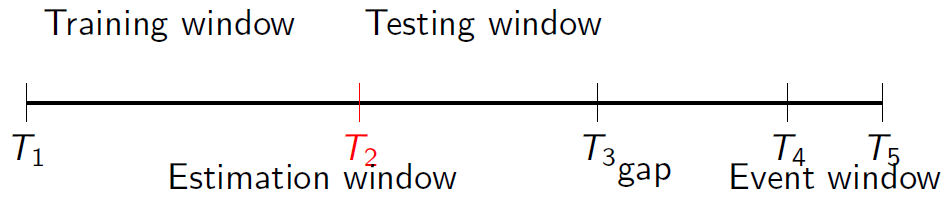

In [5]:
Image("etimeline.png")

In [6]:
# Load return data
with open('E10107.pickle', 'rb') as file:
    fdata = pickle.load(file)
fdata.head()

,10107,sprtrn,10001,10025,10032,10044,10051,10065,10100,10138,...,90916,90983,91287,91556,91626,91855,92583,92690,92807,92874
date,,,,,,,,,,,,,,,,,,,,,
2007-02-27,-0.041280,-0.034725,0.003571,-0.038251,-0.038128,-0.035600,-0.046414,-0.025514,-0.034866,-0.046676,...,-0.010475,-0.005455,-0.113435,-0.028622,-0.032856,-0.043118,-0.144250,-0.005567,-0.002146,-0.017544
2007-02-28,0.010764,0.005561,0.009964,0.030000,-0.015015,0.006151,0.032743,0.001447,-0.074346,0.017705,...,-0.007329,-0.010969,0.025638,-0.004556,0.020518,0.002163,0.047794,-0.005731,-0.004301,-0.016484
2007-03-01,-0.002840,-0.002595,0.000000,-0.026037,0.009756,-0.004396,-0.034276,-0.000719,0.023756,-0.004940,...,-0.003281,-0.007394,-0.026248,-0.004272,0.008570,0.007914,-0.056140,-0.006702,0.010799,0.017360
2007-03-02,-0.011748,-0.011403,0.000705,-0.026280,-0.020531,-0.006623,-0.006211,-0.013074,0.000000,-0.010361,...,-0.009877,-0.001122,-0.026190,-0.009501,-0.007190,-0.062812,-0.022305,-0.004723,-0.012821,-0.001963
2007-03-05,-0.007568,-0.009408,-0.027465,0.000931,-0.018496,-0.003704,-0.025893,-0.008844,-0.013812,-0.027350,...,-0.027431,-0.007491,-0.074609,-0.017327,-0.056945,-0.019802,-0.012928,-0.014237,0.004329,-0.011142


## 4. Regularized synthetic porfolio. 
Simple extension of Synthetic Control Method is to perform index tracking, that is we estimate $w^{*}$ by minimizing the tracking error in the estimation window $t \in [T_{1},T_{3}]$ and then we predict the synthetic portfolio in the event window $t \in [T_{4}, T_{5})$.
\begin{equation*}
\underset{w}{\text{minimize}} \sum_{t=T_{1}}^{T_{3}} \left( R_{1,t}-\sum_{j=2}^{J}w_{j}R_{j,t}  \right)^{2}
\end{equation*}
where $(R_{2,t},\ldots, R_{J,t})$ are the set of stock that make up the control group (firms that have not been affected by the event). A an portfolio optimization problem it is possible to include additional restrictions: non-negative weights ($w_{j}\geq 0$), $\sum_{j=2}^{J}w_{j}=1$. 
The effect of the intervention is equivalent to the abnormal returns of the asset of interest,
\begin{equation*}
  \hat{\alpha}_{1,t}=AR_{1,t}= R_{1,t}-R_{1,t}^{N} 
  					          =R_{1,t}-\sum_{j=2}^{J}w_{j}^{*}R_{j,t}, t \in [T_{4},T_{5}]
\end{equation*}
Note that finding the potential outcome is equivalent to portfolio optimization problem. Furthermore, the potential outcome is a cross-sectional weighted average over (all) available stock not affected by intervention. These asset are traded at the same time.

Synthetic portfolio method is only feasible if the the number of stocks in the control group are of moderate size with respect to the size of the estimation window (the number of pre-treatment outcomes) $J<<T_{3}-T_{1}$. In other words we need sufficient time series observations to be able to estimate the $J$-dimensional vector of portfolio weights.
Explore regularization techniques in portfolio optimization (ill-posed problem): LASSO regression, Elastic net (linear combination of LASSO and Ridge regression) and Naive synthetic portfolio.
LASSO regression
\begin{equation*}
\underset{w}{\text{minimize}} 
\sum_{t=T_{1}}^{T_{3}} \left( R_{1,t}-\sum_{j=2}^{J}w_{j}R_{j,t}  \right)^{2} +\tau \sum_{j=2}^{J}|w_{j}|
\end{equation*}
Elastic net (linear combination of LASSO and Ridge regression)
\begin{equation*}
\underset{w}{\text{minimize}} 
\sum_{t=T_{1}}^{T_{3}} \left( R_{1,t}-\sum_{j=2}^{J}w_{j}R_{j,t}  \right)^{2} +\tau (\frac{1-\alpha}{2}\sum_{j=2}^{J}w_{j}^{2}+\alpha \sum_{j=2}^{J}|w_{j}|)
\end{equation*}
Naive synthetic portfolio (equal weights, no estimation)
\begin{equation*}
  \hat{\alpha}_{1,t}^{\bar{w}}=AR_{1,t}= R_{1,t}-R_{1,t}^{\bar{w}} 
  					          =R_{1,t}-\frac{1}{J-1}\sum_{j=2}^{J} R_{j,t}, t \in [T_{4},T_{5}]
\end{equation*}

In [7]:
#estimators sklearn
reg = linear_model.LinearRegression() #OLS
slreg = linear_model.Lasso(alpha=0.0001,fit_intercept=False, max_iter=1000,positive=True) # LASSO
enreg= linear_model.ElasticNet(alpha=0.0001, l1_ratio=0.5, fit_intercept=False,positive=True) #Enet

In [8]:
def rsynth(data,date):
    #Train
    train=data.loc[:date.values[1][0],:]
    r1T_train=train.iloc[:,0]
    rmk_train=train.iloc[:,1]
    rC_train=train.iloc[:,2:]
    #Train
    test=data.loc[date.values[1][0]:date.values[2][0],:]
    r1T_test=test.iloc[:,0]
    rmk_test=test.iloc[:,1]
    rC_test=test.iloc[:,2:]
    #Train
    event=data.loc[date.values[3][0]:,:]
    r1T_event=event.iloc[:,0]
    rmk_event=event.iloc[:,1]
    rC_event=event.iloc[:,2:]
    #All window
    r1T_all=data.iloc[:,0]
    rmk_all=data.iloc[:,1]
    rC_all=data.iloc[:,2:]
    #2.ESTIMATORS
    #MARKET
    reg.fit(rmk_train.values.reshape(-1,1),r1T_train)
    #out-of-sample
    mkt_ano=1
    mkt_y_pred_os=reg.predict(rmk_test.values.reshape(-1,1)) #Potential outcome mkt model
    mkt_mse_test=mean_squared_error(r1T_test, mkt_y_pred_os)
    #event window
    mkt_r1NT=reg.predict(rmk_event.values.reshape(-1,1)) #Potential outcome mkt model
    #all window
    mkt_r1NT_all=reg.predict(rmk_all.values.reshape(-1,1)) #Potential outcome mkt model
    #LASSO
    slreg.fit(rC_train,r1T_train)
    #out-of-sample
    lsw=slreg.coef_
    if lsw.sum()!=0:
        lsw=lsw/lsw.sum() #only if weights are positive and sum is different than 0
        ls_ano=np.asarray(np.nonzero(lsw)).size
    else:
        ls_ano=0
    lXX=np.matrix(rC_test)
    lsyn_y_pred_os=np.dot(lXX,lsw)
    lsyn_mse_test=mean_squared_error(r1T_test, lsyn_y_pred_os.transpose())
    #event window
    lXX_e=np.matrix(rC_event)
    lsyn_r1NT=np.dot(lXX_e,lsw)
    #all window
    lXX_all=np.matrix(rC_all)
    lsyn_r1NT_all=np.dot(lXX_all,lsw)
    #ELASTIC NET
    enreg.fit(rC_train,r1T_train)
    #out-of-sample
    enw=enreg.coef_
    if enw.sum()!=0:
        enw=enw/enw.sum() #only if weights are positive and sum is different than 0
        en_ano=np.asarray(np.nonzero(enw)).size
    else:
        en_ano=0
    esyn_y_pred_os=np.dot(lXX,enw)
    esyn_mse_test=mean_squared_error(r1T_test, esyn_y_pred_os.transpose())
    #event window
    esyn_r1NT=np.dot(lXX_e,enw)
    #all window
    esyn_r1NT_all=np.dot(lXX_all,enw)
    #NAIVE
    #out-of-sample
    nsyn_ano=len(rC_event.columns)
    nsyn_y_pred_os=lXX.mean(1)
    nsyn_mse_test=mean_squared_error(r1T_test, nsyn_y_pred_os)
    #event window
    nsyn_r1NT=lXX_e.mean(1)
    #all window
    nsyn_r1NT_all=lXX_all.mean(1)
    #3.RESULTS
    #Treated return firm 1 and potential outcomes (non-treated)
    eventM=pd.DataFrame(np.matrix((r1T_event.values.tolist(),mkt_r1NT.tolist(),lsyn_r1NT.tolist()[0],
                   esyn_r1NT.tolist()[0],nsyn_r1NT.transpose().tolist()[0])).reshape(5,len(r1T_event)).transpose(),
                   index=r1T_event.index) #careful with 21, change
    eventM.columns=["RT","RNT_Market","RNT_Syn.Lasso","RNT_Syn.ENet","RNT_Syn.naive"]
    #Treated return firm 1 and potential outcomes (non-treated) ALL WINDOW
    allM=pd.DataFrame(np.matrix((r1T_all.values.tolist(),mkt_r1NT_all.tolist(),lsyn_r1NT_all.tolist()[0],
                   esyn_r1NT_all.tolist()[0],nsyn_r1NT_all.transpose().tolist()[0])).reshape(5,len(r1T_all)).transpose(),
                   index=r1T_all.index) #careful with 21, change
    allM.columns=["RT","RNT_Market","RNT_Syn.Lasso","RNT_Syn.ENet","RNT_Syn.naive"]
    #treatment effects=abnormal returns
    AR=pd.DataFrame(np.repeat(eventM.values[:,0],4).reshape((len(eventM),4))-eventM.values[:,1:],index=r1T_event.index)
    AR.columns=["AR_Market","AR_Syn.Lasso","AR_Syn.ENet","AR_Syn.naive"]
    #cummultative abnormal returns
    CAR=AR.cumsum(0)
    CAR.columns=["CAR_Market","CAR_Syn.Lasso","CAR_Syn.ENet","CAR_Syn.naive"]
    #individual test parametric(t.test) and non-parametric(wilcoxon)
    mkt_ttest=stats.ttest_ind(eventM.values[:,0],eventM.values[:,1], equal_var = False)
    mkt_wtest=stats.wilcoxon(eventM.values[:,0],eventM.values[:,1], zero_method='wilcox')
    lsyn_ttest=stats.ttest_ind(eventM.values[:,0],eventM.values[:,2], equal_var = False)
    lsyn_wtest=stats.wilcoxon(eventM.values[:,0],eventM.values[:,2], zero_method='wilcox')
    esyn_ttest=stats.ttest_ind(eventM.values[:,0],eventM.values[:,3], equal_var = False)
    esyn_wtest=stats.wilcoxon(eventM.values[:,0],eventM.values[:,3], zero_method='wilcox')
    nsyn_ttest=stats.ttest_ind(eventM.values[:,0],eventM.values[:,4], equal_var = False)
    nsyn_wtest=stats.wilcoxon(eventM.values[:,0],eventM.values[:,4], zero_method='wilcox')
    ttestp=[mkt_ttest.pvalue,lsyn_ttest.pvalue,esyn_ttest.pvalue,nsyn_ttest.pvalue]
    wtestp=[mkt_wtest.pvalue,lsyn_wtest.pvalue,esyn_wtest.pvalue,nsyn_wtest.pvalue]
    #1 sample CAR t-test
    mkt_tcar=stats.ttest_1samp(CAR['CAR_Market'].values,0)
    lsyn_tcar=stats.ttest_1samp(CAR['CAR_Syn.Lasso'].values,0)
    esyn_tcar=stats.ttest_1samp(CAR['CAR_Syn.ENet'].values,0)
    nsyn_tcar=stats.ttest_1samp(CAR['CAR_Syn.naive'].values,0)
    tcarp=[mkt_tcar.pvalue,lsyn_tcar.pvalue,esyn_tcar.pvalue,nsyn_tcar.pvalue]
    #Mean square error table testing window
    mseM=[mkt_mse_test,lsyn_mse_test,esyn_mse_test,nsyn_mse_test]
    Nass=[mkt_ano,ls_ano,en_ano,nsyn_ano]
    model=["Market","Syn.Lasso","Syn.ENet","Syn.naive"]
    testM=pd.DataFrame(np.matrix((Nass,mseM,CAR.iloc[CAR.shape[0]-1,:].tolist(),
                              tcarp,ttestp,wtestp)).reshape(6,4).transpose(),index=model)
    testM.columns=['No.AssetsPort','MSE_test.w','CAR','CAR_t.test','AR_t.test','AR_wilcoxon']
    testM=pd.DataFrame(np.matrix((Nass,mseM,AR.sum(0).tolist(),ttestp,wtestp)).reshape(5,4).transpose(),index=model)
    testM.columns=['No.AssetsPort','MSE_test.w','CAR','CAR_t.test','CAR_wilcoxon']
    #weights
    wpo=pd.Series(lsw,index=data.columns[2:])
    wpo=wpo.iloc[np.nonzero(lsw)]
    out=(testM,eventM,AR,allM,wpo,CAR)
    return out

## 5. Results: Short term effects on stock retunrs of the potential acquirer/bidder (Microsoft Corp) 
For the application the number of assets available to estimate the synthetic porforlio are $2947$ and the number of observations is $246$. Therefore we use regularized synthetic porfolio, in particular the Lasso version which perfom best in simulation studies.

In [9]:
res=rsynth(fdata,edate)

In [10]:
#Cummulative abnormal returns for a 10 day window
res[0]

,No.AssetsPort,MSE_test.w,CAR,CAR_t.test,CAR_wilcoxon
Market,1.0,0.000301,-0.134413,0.258339,0.169775
Syn.Lasso,15.0,0.000663,-0.366736,0.026909,0.004615
Syn.ENet,38.0,0.000464,-0.210532,0.131518,0.073451
Syn.naive,2947.0,0.000321,-0.169504,0.155294,0.079215


In [11]:
#Weigths from LASSO
lweights=res[4]
#lweights
#include ticker symbols

In [12]:
import matplotlib.pyplot as plt

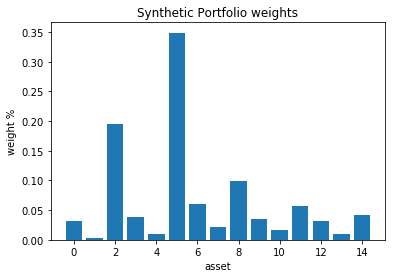

In [13]:
#Plot the weights with bar plot
plt.bar(range(lweights.shape[0]), lweights.values)
plt.xlabel('asset')
plt.ylabel('weight %')
plt.title('Synthetic Portfolio weights')
#plt.xticks(lweights.index.tolist())
plt.show()

In [14]:
import seaborn as sns
sns.set_style("white")

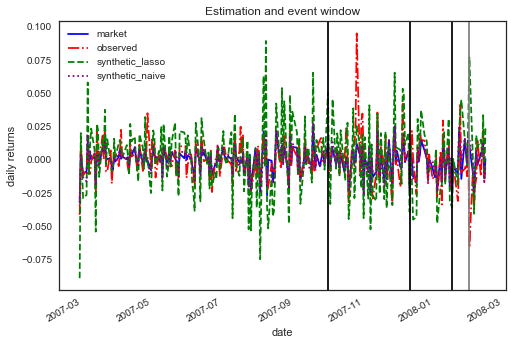

In [15]:
#Line graph of observed, mkt model fitted and synthetic returns
dfp=res[3]
f, ax = plt.subplots(1, 1)
#x_col='date'
#y_col='daily returns'
ax.plot_date(dfp.index, dfp["RNT_Market"], color="blue", label='market', linestyle="-", marker=None)
ax.plot_date(dfp.index, dfp["RT"], color="red", label='observed', linestyle="-.", marker=None)
ax.plot_date(dfp.index, dfp["RNT_Syn.Lasso"], color="green", label='synthetic_lasso', linestyle="--", marker=None)
#ax.plot_date(dfp.index, dfp["RNT_Syn.ENet"], color="brown", label='synthetic_enet', linestyle="--", marker=None)
ax.plot_date(dfp.index, dfp["RNT_Syn.naive"], color="purple", label='synthetic_naive', linestyle=":", marker=None)
ax.legend(loc='upper left')
ax.axvline(x=edate.loc['Event_0'][0], color="gray")
ax.axvline(x=edate.loc['T2'][0], color="black")
ax.axvline(x=edate.loc['T3'][0], color="black")
ax.axvline(x=edate.loc['T4'][0], color="black")
plt.xlabel('date')
plt.ylabel('daily returns')
plt.title('Estimation and event window')
plt.gcf().autofmt_xdate()
plt.show()

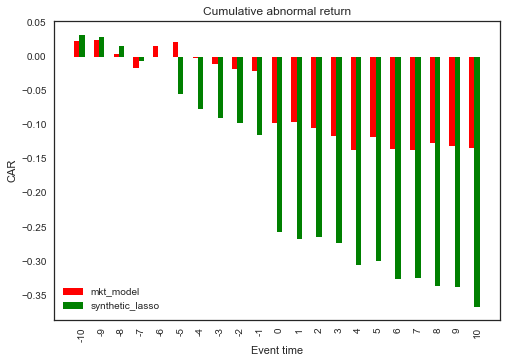

In [22]:
ar=res[5]
from matplotlib import dates
N = ar.shape[0]
ind = np.arange(-np.int((ar.shape[0]-1)/2), np.int((ar.shape[0]-1)/2)+1, 1)  # the x locations for the groups
width = 0.27       # the width of the bars
fig = plt.figure()
arp = fig.add_subplot(111)
rects1 = arp.bar(ind, ar['CAR_Market'], width, color='r')
rects2 = arp.bar(ind+width, ar['CAR_Syn.Lasso'], width, color='g')
#arp.axvline(x= pd.to_datetime(evdate))
arp.set_title('Cumulative abnormal return')
arp.set_ylabel('CAR')
arp.set_xlabel('Event time')
arp.set_xticks(ind+width)
arp.set_xticklabels(ind)
arp.legend( (rects1[0], rects2[0]), ('mkt_model', 'synthetic_lasso'), loc='lower left')
#formatter = DateFormatter('%Y-%m-%d')
#arp.xaxis.set_major_formatter(formatter)
#plt.gcf().autofmt_xdate()
plt.xticks(rotation=90)
plt.show()